# Current Analysis Notebook

In [384]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


## Hypothesis

In [385]:
def uniform(x, a):
    return 0*x + a

def linear(x, a, b):
    return a*x + b

def exponential(x, a, b, c):
    return a*np.exp(b*x) + c

## General Functions

In [386]:
def load_data(filename):
    """
    Read, load and process data and return arrays containing the time, voltage and mean current readings of the run
    """
    # Import the raw data file as an array of strings
    data = np.loadtxt(filename, dtype=str, usecols=range(6),)

    # Locate elements of array associated to the first elemont of a header
    header_mask = data == "time"
    header_idx = np.argwhere(header_mask)[:, 0]

    # Remove all rows containing headers and convert array elements to floats
    processed_data = np.delete(data, header_idx, axis=0).astype(np.float32)


    negative_mask = processed_data[:,0] < 0.0
    negative_idx = np.argwhere(negative_mask)
    print(negative_mask.astype(int).sum())
    processed_data = np.delete(processed_data, negative_idx, axis=0).astype(np.float32)

    # Excract from the data the timiing and meant current datapoints
    time = processed_data[:, 0] 
    voltage = processed_data[:, 1]
    mean_current = processed_data[:, 2] 
    mean_current_err = processed_data[:, 3] 
    
    return time, voltage, mean_current, mean_current_err


def hypothesis_test_uniform(indexes, time, current, current_err):

    idx1, idx2 = indexes

    time, current, current_err = time[idx1:idx2], current[idx1:idx2], current_err[idx1:idx2] if current_err is not None else None

    popt, pcov = curve_fit(uniform, time, current, sigma=None)

    fitted_curr = popt[-1]
    fitted_curr_err = np.sqrt(np.diag(pcov))[-1]

    return fitted_curr, fitted_curr_err

def hypothesois_test_exponential(indexes, time, current, current_err):

    idx1, idx2 = indexes

    time, current, current_err = time[idx1:idx2], current[idx1:idx2], current_err[idx1:idx2] if current_err is not None else None

    popt, pcov = curve_fit(exponential, time, current, sigma=None)

    time_const = popt[1]
    time_const_err = np.sqrt(np.diag(pcov))[1]

    return time_const, time_const_err

## Xray irradiation on 183

In [387]:
run17_filedir = "/Users/giorgio/Gsi_data/Eris_run017.txt"

time, voltage, mean_current, mean_current_err = load_data(run17_filedir)

base_idx = (141, 500)
xray_idx = [
    (650, 800), (830, 1500), (1630, 2850), (2966, 3850), (4062, 5380), (5475, 5842), (5900, 6125),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_183 = []
xray_curr_err_183 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, mean_current_err
    )
    xray_curr_183.append(_curr-base_curr)
    xray_curr_err_183.append(_curr_err+base_curr_err)

56


## Xray irradiation on 182

In [388]:
run18_filedir = "/Users/giorgio/Gsi_data/Eris_run018.txt"

time, voltage, mean_current, mean_current_err = load_data(run18_filedir)

base_idx = (10, 111)
xray_idx = [
    (593, 951), (1646, 2443), (2968, 3381), (4148, 5089), (5702, 6237), (6745, 7080-200), (8543, 9008-200),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_182 = []
xray_curr_err_182 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_182.append(_curr-base_curr)
    xray_curr_err_182.append(_curr_err+base_curr_err)

26


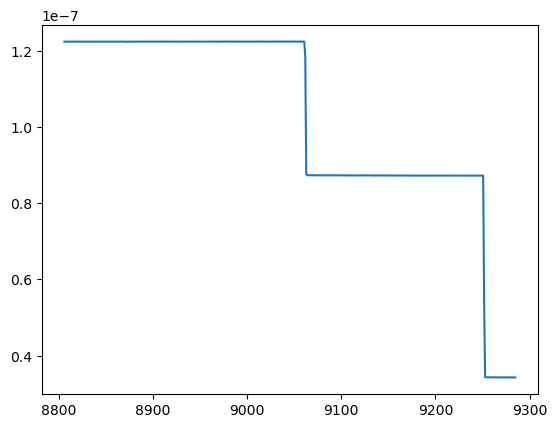

In [389]:
idx1, idx2= 8543, 9008
plt.plot(time[idx1:idx2], mean_current[idx1:idx2])


## Xray irradiation on 171 

In [390]:
run19_filedir = "/Users/giorgio/Gsi_data/Eris_run019.txt"

time, voltage, mean_current, mean_current_err = load_data(run19_filedir)

base_idx = (63, 106)
xray_idx = [
    (508, 759), (1014, 1351), (1950, 2381), (2651, 2884), (3235, 3603), (3955, 4234-100), (4521, 4839-100),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_171 = []
xray_curr_err_171 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_171.append(_curr-base_curr)
    xray_curr_err_171.append(_curr_err+base_curr_err)

0


In [391]:
xray_intensity = [(i+1)*10 for i in range(7)]

## Xray on 178

In [392]:

run20_filedir = "/Users/giorgio/Gsi_data/Eris_run020.txt"

time, voltage, mean_current, mean_current_err = load_data(run20_filedir)

base_idx = (76, 115)
xray_idx = [
    (228, 603), (1009, 1251), (1384, 1590),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_178 = []
xray_curr_err_178 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_178.append(_curr-base_curr)
    xray_curr_err_178.append(_curr_err+base_curr_err)

0


In [393]:
run21_filedir = "/Users/giorgio/Gsi_data/Eris_run021.txt"

time, voltage, mean_current, mean_current_err = load_data(run21_filedir)

base_idx = (76, 126)
xray_idx = [
    (508, 870), (920, 1160), (1210, 1645), (2587, 2890)
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_178.append(_curr-base_curr)
    xray_curr_err_178.append(_curr_err+base_curr_err)

0


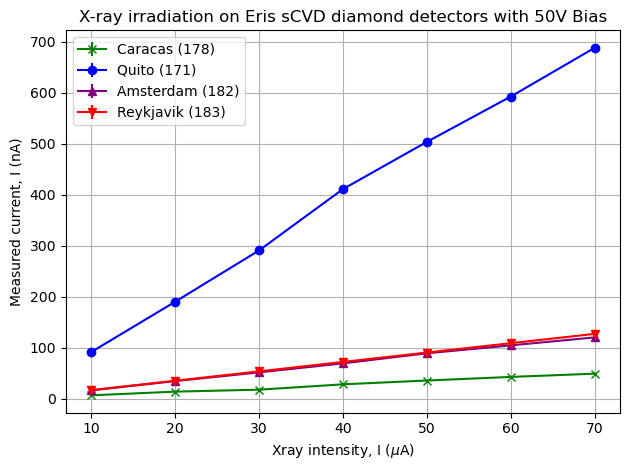

In [394]:
xray_intensity = [(i+1)*10 for i in range(7)]
plt.errorbar(xray_intensity, 1e9*np.array(xray_curr_178), yerr=xray_curr_err_178, label="Caracas (178)", c="green", marker="x")
plt.errorbar(xray_intensity, 1e9*np.array(xray_curr_171), yerr=xray_curr_err_171, label="Quito (171)", c="blue", marker="o")
plt.errorbar(xray_intensity, 1e9*np.array(xray_curr_182), yerr=xray_curr_err_182, label="Amsterdam (182)", c="purple", marker="^")
plt.errorbar(xray_intensity, 1e9*np.array(xray_curr_183), yerr=xray_curr_err_183, label="Reykjavik (183)", c="red", marker="v")
plt.grid()
plt.legend()
plt.title("X-ray irradiation on Eris sCVD diamond detectors with 50V Bias")
plt.ylabel("Measured current, I (nA)")
plt.xlabel(r"Xray intensity, I ($\mu$A)")
plt.tight_layout()

## Xray on 11 (200V) (178)

In [395]:
run22_filedir = "/Users/giorgio/Gsi_data/Eris_run022.txt"

time, voltage, mean_current, mean_current_err = load_data(run22_filedir)

base_idx = (1500, 3600)
xray_idx = [
    (4598, 6626), (6900, 7300), (7800, 9100), (9200, 9551), (9800, 10230), (10500, 11200), (11230, 11600),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_11_200 = []
xray_curr_err_11_200 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_11_200.append(_curr-base_curr)
    xray_curr_err_11_200.append(_curr_err+base_curr_err)

0


## Xray on 01 (200V) (171)

In [396]:

run23_filedir = "/Users/giorgio/Gsi_data/Eris_run023.txt"

time, voltage, mean_current, mean_current_err = load_data(run23_filedir)

base_idx = (3, 30)
xray_idx = [
    (320, 915), (1550, 2400), (3060, 3750), (4100, 4750), (4810, 5300), (6900, 7600), (7750, 8300),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_01_200 = []
xray_curr_err_01_200 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_01_200.append(_curr-base_curr)
    xray_curr_err_01_200.append(_curr_err+base_curr_err)

0


## Xray on 00 (183)

In [397]:

run24_filedir = "/Users/giorgio/Gsi_data/Eris_run024.txt"

time, voltage, mean_current, mean_current_err = load_data(run24_filedir)

base_idx = (3, 55)
xray_idx = [
    (320, 715), (830, 970), (1050, 1350), (1720, 2100), (2900, 3150), (3300, 3550), (3650, 4100),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_00_200 = []
xray_curr_err_00_200 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_00_200.append(_curr-base_curr)
    xray_curr_err_00_200.append(_curr_err+base_curr_err)

0


## Xray on 10 (182)

In [398]:

run25_filedir = "/Users/giorgio/Gsi_data/Eris_run025.txt"

time, voltage, mean_current, mean_current_err = load_data(run25_filedir)

base_idx = (3, 55)
xray_idx = [
    (210, 330), (400, 1000), (1200, 1500), (1650, 1980), (2100, 2350), (2450, 2650), (2700, 2950),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_10_200 = []
xray_curr_err_10_200 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_10_200.append(_curr-base_curr)
    xray_curr_err_10_200.append(_curr_err+base_curr_err)

0


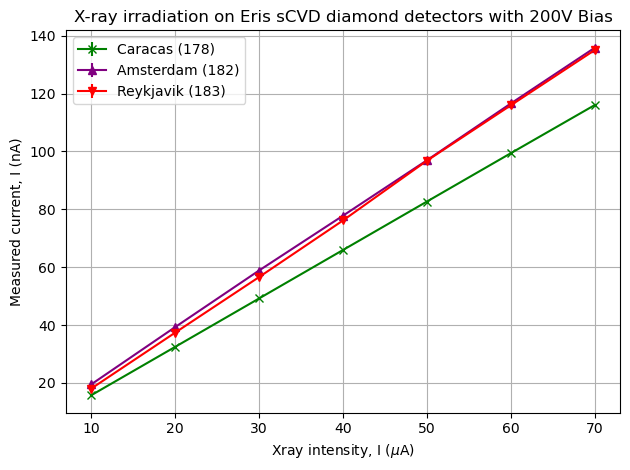

In [399]:

xray_intensity = [(i+1)*10 for i in range(7)]
plt.errorbar(xray_intensity, 1e9*np.array(xray_curr_11_200), yerr=xray_curr_err_11_200, label="Caracas (178)", c="green", marker="x")
# plt.errorbar(xray_intensity, 1e9*np.array(xray_curr_01_200), yerr=xray_curr_err_01_200, label="Quito (171)", c="blue", marker="o")
plt.errorbar(xray_intensity, 1e9*np.array(xray_curr_10_200), yerr=xray_curr_err_10_200, label="Amsterdam (182)", c="purple", marker="^")
plt.errorbar(xray_intensity, 1e9*np.array(xray_curr_00_200), yerr=xray_curr_err_00_200, label="Reykjavik (183)", c="red", marker="v")
plt.grid()
plt.legend()
plt.title("X-ray irradiation on Eris sCVD diamond detectors with 200V Bias")
plt.ylabel("Measured current, I (nA)")
plt.xlabel(r"Xray intensity, I ($\mu$A)")
plt.tight_layout()

## Xray on 00 (183)

In [400]:
run26_filedir = "/Users/giorgio/Gsi_data/Eris_run026.txt"

time, voltage, mean_current, mean_current_err = load_data(run26_filedir)

base_idx = (3, 55)
xray_idx = [
    (120, 180), (300, 490), (650, 750), (800, 905),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_00_1000 = []
xray_curr_err_00_1000 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_00_1000.append(_curr-base_curr)
    xray_curr_err_00_1000.append(_curr_err+base_curr_err)

0


## Xray on 01 (171)


In [401]:

run27_filedir = "/Users/giorgio/Gsi_data/Eris_run027.txt"

time, voltage, mean_current, mean_current_err = load_data(run27_filedir)

base_idx = (3, 55)
xray_idx = [
    (300, 470), (520, 680), (800, 980), (1030, 1190),
]

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
xray_curr_01_1000 = []
xray_curr_err_01_1000 = []

for idxs in xray_idx:
    idx1, idx2 = idxs
    _curr, _curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )
    xray_curr_01_1000.append(_curr-base_curr)
    xray_curr_err_01_1000.append(_curr_err+base_curr_err)

0


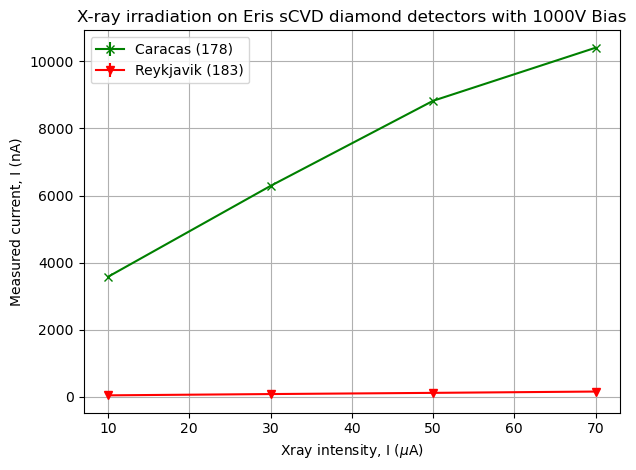

In [402]:

xray_intensity_short = [10, 30, 50, 70]
plt.errorbar(xray_intensity_short, 1e9*np.array(xray_curr_01_1000), yerr=xray_curr_err_01_1000, label="Caracas (178)", c="green", marker="x")
plt.errorbar(xray_intensity_short, 1e9*np.array(xray_curr_00_1000), yerr=xray_curr_err_00_1000, label="Reykjavik (183)", c="red", marker="v")
plt.grid()
plt.legend()
plt.title("X-ray irradiation on Eris sCVD diamond detectors with 1000V Bias")
plt.ylabel("Measured current, I (nA)")
plt.xlabel(r"Xray intensity, I ($\mu$A)")
plt.tight_layout()

Text(0.5, 1.02, 'X-ray irradiation on Eris sCVD diamond detectors')

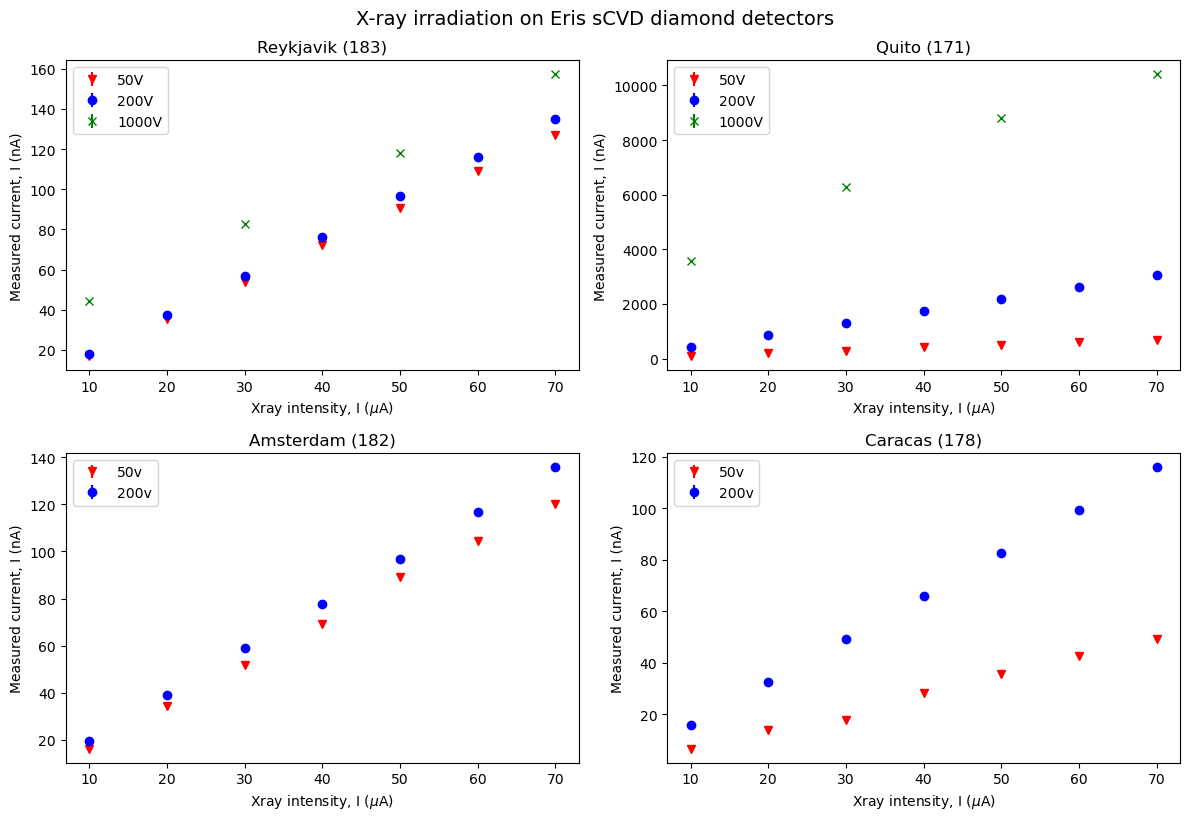

In [403]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.errorbar(xray_intensity, 1e9*np.array(xray_curr_183), yerr=xray_curr_err_183, label="50V", c="red", marker="v", ls="", )
ax1.errorbar(xray_intensity, 1e9*np.array(xray_curr_00_200), yerr=xray_curr_err_00_200, label="200V", c="blue", marker="o", ls="")
ax1.errorbar(xray_intensity_short, 1e9*np.array(xray_curr_00_1000), yerr=xray_curr_err_00_1000, label="1000V", c="green", marker="x", ls="")
ax1.set_ylabel("Measured current, I (nA)")
ax1.set_xlabel(r"Xray intensity, I ($\mu$A)")
ax1.set_title(r"Reykjavik (183)")
ax1.legend()

ax2.errorbar(xray_intensity, 1e9*np.array(xray_curr_171), yerr=xray_curr_err_171, label="50V", c="red", marker="v", ls="", )
ax2.errorbar(xray_intensity, 1e9*np.array(xray_curr_01_200), yerr=xray_curr_err_01_200, label="200V", c="blue", marker="o", ls="")
ax2.errorbar(xray_intensity_short, 1e9*np.array(xray_curr_01_1000), yerr=xray_curr_err_01_1000, label="1000V", c="green", marker="x", ls="")
ax2.set_ylabel("Measured current, I (nA)")
ax2.set_xlabel(r"Xray intensity, I ($\mu$A)")
ax2.set_title(r"Quito (171)")
ax2.legend()

ax3.errorbar(xray_intensity, 1e9*np.array(xray_curr_182), yerr=xray_curr_err_182, label="50v", c="red", marker="v", ls="", )
ax3.errorbar(xray_intensity, 1e9*np.array(xray_curr_10_200), yerr=xray_curr_err_10_200, label="200v", c="blue", marker="o", ls="")
ax3.set_ylabel("Measured current, I (nA)")
ax3.set_xlabel(r"Xray intensity, I ($\mu$A)")
ax3.set_title(r"Amsterdam (182)")
ax3.legend()

ax4.errorbar(xray_intensity, 1e9*np.array(xray_curr_178), yerr=xray_curr_err_178, label="50v", c="red", marker="v", ls="", )
ax4.errorbar(xray_intensity, 1e9*np.array(xray_curr_11_200), yerr=xray_curr_err_11_200, label="200v", c="blue", marker="o", ls="")
ax4.set_ylabel("Measured current, I (nA)")
ax4.set_xlabel(r"Xray intensity, I ($\mu$A)")
ax4.set_title(r"Caracas (178)")
ax4.legend()

fig.tight_layout()
fig.suptitle("X-ray irradiation on Eris sCVD diamond detectors", y=1.02, fontsize=14)

## Neg Bias $\alpha$ vs HV

In [404]:
run4_filedir = "/Users/giorgio/Gsi_data/Eris_run004.txt"

time, voltage, mean_current, mean_current_err = load_data(run4_filedir)

voltage_idx = [
    (60, 230, 245, 281),
    (685, 1390, 1453, 2510),
    (3233, 4028, 4149, 5849),
    (6843, 7578, 7694, 11500),
    (12352, 13100, 13230, 14100),
    (14353, 16123, 16218, 17390),
    (17600, 17700, 17808, 18316),
    (18680, 18980, 19000, 19200),
]

baseline_curr_neg = []
baseline_curr_err_neg = []
delta_curr_neg = []
delta_curr_err_neg = []

for idxs in voltage_idx:
    idx1, idx2, idx3, idx4 = idxs

    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx3,idx4), time, mean_current, None
    )

    delta_curr_neg.append(peak_curr-base_curr)
    delta_curr_err_neg.append(peak_curr_err-base_curr_err)

    baseline_curr_neg.append(base_curr)
    baseline_curr_err_neg.append(base_curr_err)


0


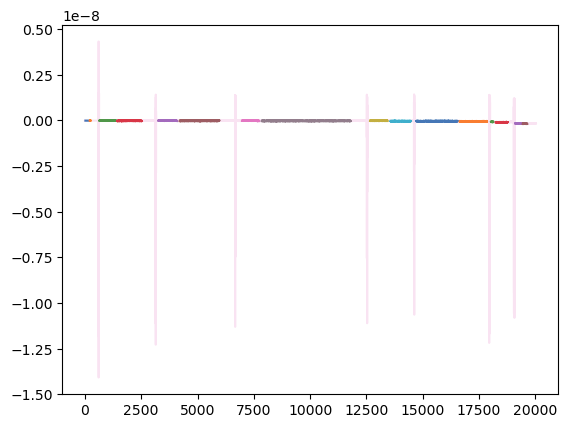

In [405]:
for idx in voltage_idx:
    plt.plot(time[idx[0]:idx[1]], mean_current[idx[0]:idx[1]])
    plt.plot(time[idx[2]:idx[3]], mean_current[idx[2]:idx[3]])

plt.plot(time, mean_current, alpha =0.2)

## Pos Bias $\alpha$ vs HV

In [406]:

run2_filedir = "/Users/giorgio/Gsi_data/Eris_run002.txt"
run3_filedir = "/Users/giorgio/Gsi_data/Eris_run003.txt"

time_2, voltage_2, mean_current_2, mean_current_err_2 = load_data(run2_filedir)
time_3, voltage_3, mean_current_3, mean_current_err_3 = load_data(run3_filedir)

voltage_idx_1 = [
    (20, 80, 300, 500),
    (737, 888, 927, 1724),
    (2023, 2208, 2296, 3000),
    (3364, 3751, 3842, 4723),
    (5032, 5544, 5625, 6359),
    (6648, 7105, 7459, 8100),
    (8509, 8950, 9481, 10440),
]
voltage_idx_2 = [
    (8026, 8181),
    (29806, 30123),
    (31173, 31391),
    (31610, 31716),
    (32053, 32303),
]

delta_curr_pos = []
delta_curr_err_pos = []
baseline_curr_pos = []
baseline_curr_err_pos = []

for i, idxs in enumerate(voltage_idx_1):

    idx1, idx2, idx3, idx4 = idxs
    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time_2, mean_current_2, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx3,idx4), time_2, mean_current_2, None
    )

    delta_curr_pos.append(peak_curr-base_curr)
    delta_curr_err_pos.append(peak_curr_err-base_curr_err)
    baseline_curr_pos.append(base_curr)
    baseline_curr_err_pos.append(base_curr_err)

16
50


In [407]:
print(delta_curr_pos)

[1.5073011005191553e-12, 1.0996471982016408e-11, 1.2878708818755202e-11, 1.7316150914369345e-11, 2.643182494024793e-11, 4.094171372598948e-11, 6.200074147952044e-11]


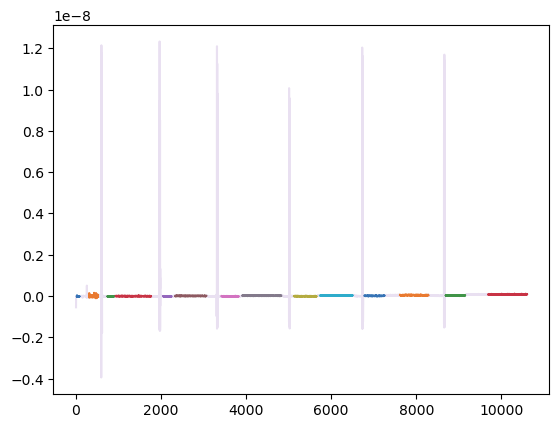

In [408]:
for i, idx in enumerate(voltage_idx_1):
    plt.plot(time_2[idx[0]:idx[1]], mean_current_2[idx[0]:idx[1]])
    plt.plot(time_2[idx[2]:idx[3]], mean_current_2[idx[2]:idx[3]])


plt.plot(time_2, mean_current_2, alpha =0.2)

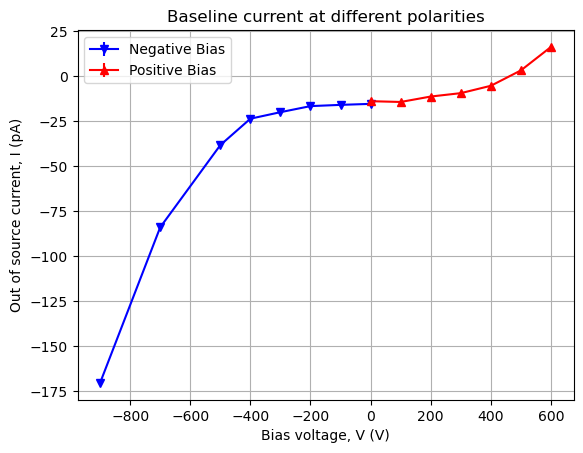

In [409]:
hv_neg = [0, -100, -200, -300, -400, -500, -700, -900]
hv_pos = [0, 100, 200, 300, 400, 500, 600]

plt.errorbar(hv_neg, 1e12*np.array(baseline_curr_neg), yerr=baseline_curr_err_neg, c="blue", label="Negative Bias", marker="v")
plt.errorbar(hv_pos, 1e12*np.array(baseline_curr_pos), yerr=baseline_curr_err_pos, c="red", label="Positive Bias", marker="^")
plt.title("Baseline current at different polarities")
plt.xlabel("Bias voltage, V (V)")
plt.ylabel("Out of source current, I (pA)")
plt.legend()
plt.grid()

In [410]:
delta_curr_pos

[1.5073011005191553e-12,
 1.0996471982016408e-11,
 1.2878708818755202e-11,
 1.7316150914369345e-11,
 2.643182494024793e-11,
 4.094171372598948e-11,
 6.200074147952044e-11]

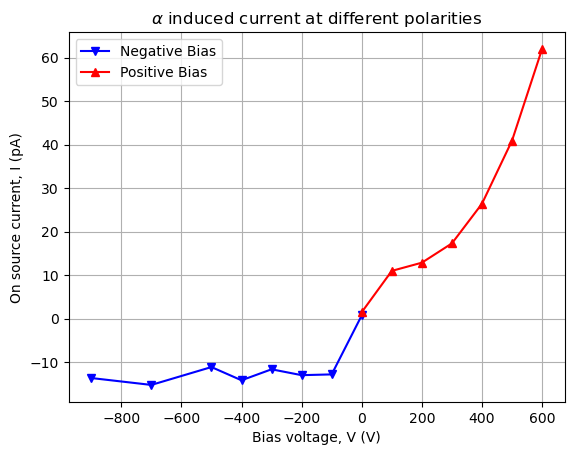

In [411]:
hv_neg = [0, -100, -200, -300, -400, -500, -700, -900]
hv_pos = [0, 100, 200, 300, 400, 500, 600]

plt.errorbar(hv_neg, 1e12*np.array(delta_curr_neg), c="blue", label="Negative Bias", marker="v")
plt.errorbar(hv_pos, 1e12*np.array(delta_curr_pos), c="red", label="Positive Bias", marker="^")
plt.title(r"$\alpha$ induced current at different polarities")
plt.xlabel("Bias voltage, V (V)")
plt.ylabel("On source current, I (pA)")
plt.legend()
plt.grid()

## $\alpha$ on 178

In [412]:

run9_filedir = "/Users/giorgio/Gsi_data/Eris_run015.txt"

time, voltage, mean_current, mean_current_err = load_data(run9_filedir)


voltage_idx = ( 
    (2, 123), 
    (588, 743, 800, 879), 
    (1816, 2011, 4137, 5363), 
)
 

delta_curr_0 = {}
delta_curr_50 = {}
delta_curr_err_0 = {}
delta_curr_err_50 = {}
delta_curr_200 = {}
delta_curr_err_200 = {}
time_const_0 = {}
time_const_err_0 = {}
time_const_50 = {}
time_const_err_50 = {}
time_const_200 = {}
time_const_err_200 = {}

for i, idxs  in enumerate(voltage_idx):
    if i==0:
        idx1, idx2, = idxs
    else:
        idx1, idx2, idx3, idx4, = idxs

    if i ==0:
        base_curr, base_curr_err = hypothesis_test_uniform(
            (idx1,idx2), time, mean_current, None
        )
        continue


    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )

    time_const, time_const_err = hypothesois_test_exponential(
        (idx3,idx4), time, mean_current, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx3,idx4), time, mean_current, None
    )

    if i==0:
        delta_curr_0["178"] = base_curr
        delta_curr_err_0["178"] = base_curr_err
        time_const_0["178"] = time_const
        time_const_err_0["178"] = time_const_err

    if i==1:
        delta_curr_50["178"] = peak_curr-base_curr
        delta_curr_err_50["178"] = peak_curr_err-base_curr_err
        time_const_50["178"] = time_const
        time_const_err_50["178"] = time_const_err

    if i==2:
        delta_curr_200["178"] = peak_curr-base_curr
        delta_curr_err_200["178"] = peak_curr_err-base_curr_err
        time_const_200["178"] = time_const
        time_const_err_200["178"] = time_const_err

0


/var/folders/dk/zs7h02z53j9ds6738jdj68cw0000gn/T/ipykernel_1898/4149368633.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential, time, current, sigma=None)
/var/folders/dk/zs7h02z53j9ds6738jdj68cw0000gn/T/ipykernel_1898/1605334149.py:8: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x) + c


## $\alpha$ on 183

In [413]:

run14_filedir = "/Users/giorgio/Gsi_data/Eris_run014.txt"

time, voltage, mean_current, mean_current_err = load_data(run9_filedir)

voltage_idx = [
    (15, 132),
    (370, 469, 200, 346),
    (720, 1530, 1625, 3455),
    ]

for i, idxs  in enumerate(voltage_idx):
    if i==0:
        idx1, idx2, = idxs
    else:
        idx1, idx2, idx3, idx4, = idxs

    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )

    time_const, time_const_err = hypothesois_test_exponential(
        (idx3,idx4), time, mean_current, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx3,idx4), time, mean_current, None
    )

    if i==0:
        delta_curr_0["183"] = peak_curr-base_curr
        delta_curr_err_0["183"] = peak_curr_err-base_curr_err
        time_const_0["183"] = time_const
        time_const_err_0["183"] = time_const_err

    if i==1:
        delta_curr_50["183"] = peak_curr-base_curr
        delta_curr_err_50["183"] = peak_curr_err-base_curr_err
        time_const_50["183"] = time_const
        time_const_err_50["183"] = time_const_err

    if i==2:
        delta_curr_200["183"] = peak_curr-base_curr
        delta_curr_err_200["183"] = peak_curr_err-base_curr_err
        time_const_200["183"] = time_const
        time_const_err_200["183"] = time_const_err

0


/var/folders/dk/zs7h02z53j9ds6738jdj68cw0000gn/T/ipykernel_1898/1605334149.py:8: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x) + c
/var/folders/dk/zs7h02z53j9ds6738jdj68cw0000gn/T/ipykernel_1898/4149368633.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential, time, current, sigma=None)


## $\alpha$ on 171

In [414]:
voltage_idx = (
    (16, 100, 240, 318,),
    (423, 517, 550, 912, 1030, 1303), 
    (1726, 1979, 2027, 2503, 2832, 3561), 
)



run14_filedir = "/Users/giorgio/Gsi_data/Eris_run016.txt"

time, voltage, mean_current, mean_current_err = load_data(run9_filedir)



for i, idxs  in enumerate(voltage_idx):
    if i==0:
        idx1, idx2, idx3, idx4, = idxs
    else:
        idx1, idx2, idx3, idx4, idx5, idx6 = idxs

    if i==0:
        base_curr, base_curr_err = hypothesis_test_uniform(
            (idx1,idx2), time, mean_current, None
        )

        peak_curr, peak_curr_err = hypothesis_test_uniform(
            (idx3,idx4), time, mean_current, None
        )
    
    else:
        base_curr, base_curr_err = hypothesis_test_uniform(
            (idx1,idx2), time, mean_current, None
        )

        time_const, time_const_err = hypothesois_test_exponential(
            (idx3,idx4), time, mean_current, None
        )

        peak_curr, peak_curr_err = hypothesis_test_uniform(
            (idx5,idx6), time, mean_current, None
        )

    if i==0:
        delta_curr_0["171"] = abs(peak_curr)-abs(base_curr)
        delta_curr_err_0["171"] = abs(peak_curr_err)-abs(base_curr_err)
        time_const_0["171"] = time_const
        time_const_err_0["171"] = time_const_err

    if i==1:
        print(peak_curr, base_curr)
        delta_curr_50["171"] = -(abs(peak_curr)-abs(base_curr))
        delta_curr_err_50["171"] = abs(peak_curr_err)-abs(base_curr_err)
        time_const_50["171"] = time_const
        time_const_err_50["171"] = time_const_err
    if i==2:
        print(peak_curr, base_curr)
        delta_curr_200["171"] = -(abs(peak_curr)-abs(base_curr))
        delta_curr_err_200["171"] = abs(peak_curr_err)-abs(base_curr_err)
        time_const_200["171"] = time_const
        time_const_err_200["171"] = time_const_err

0
-2.5834969661142097e-12 3.4898202097352517e-10
1.8513961134244797e-11 2.344234138358866e-10


/var/folders/dk/zs7h02z53j9ds6738jdj68cw0000gn/T/ipykernel_1898/4149368633.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential, time, current, sigma=None)
/var/folders/dk/zs7h02z53j9ds6738jdj68cw0000gn/T/ipykernel_1898/1605334149.py:8: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x) + c


## $\alpha$ on 182

In [415]:

voltage_idx = ( 
    (29, 184), 
    (255, 346, 369, 1324, 1402, 2242), 
    (2533, 2676, 2739, 3669, 3750, 5117), 
)



run12_filedir = "/Users/giorgio/Gsi_data/Eris_run012.txt"

time, voltage, mean_current, mean_current_err = load_data(run12_filedir)



for i, idxs  in enumerate(voltage_idx):
    if i==0:
        idx1, idx2, = idxs
    else:
        idx1, idx2, idx3, idx4, idx5, idx6 = idxs

    if i == 0:
        base_curr, base_curr_err = hypothesis_test_uniform(
            (idx1,idx2), time, mean_current, None
        )
        continue


    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )

    time_const, time_const_err = hypothesois_test_exponential(
        (idx3,idx4), time, mean_current, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx5,idx6), time, mean_current, None
    )

    if i==0:
        delta_curr_0["182"] = base_curr
        delta_curr_err_0["182"] = base_curr_err
        # time_const_0["182"] = time_const
        # time_const_err_0["182"] = time_const_err

    if i==1:
        delta_curr_50["182"] = peak_curr-base_curr
        delta_curr_err_50["182"] = peak_curr_err-base_curr_err
        time_const_50["182"] = time_const
        time_const_err_50["182"] = time_const_err
    if i==2:
        delta_curr_200["182"] = peak_curr-base_curr
        delta_curr_err_200["182"] = peak_curr_err-base_curr_err
        time_const_200["182"] = time_const
        time_const_err_200["182"] = time_const_err

0


/var/folders/dk/zs7h02z53j9ds6738jdj68cw0000gn/T/ipykernel_1898/1605334149.py:8: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x) + c
/var/folders/dk/zs7h02z53j9ds6738jdj68cw0000gn/T/ipykernel_1898/4149368633.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential, time, current, sigma=None)


In [416]:
print (delta_curr_0)
print (delta_curr_50)
print(delta_curr_200)

{'183': -4.021841544699746e-11, '171': -8.581324481518953e-12}
{'178': 2.4591702184530174e-11, '183': 4.875974771598965e-11, '171': 3.46398524007411e-10, '182': 6.44367599255367e-12}
{'178': 2.7657164626464677e-11, '183': 6.304874364858437e-11, '171': 2.1590945270164182e-10, '182': 3.084274480625674e-11}


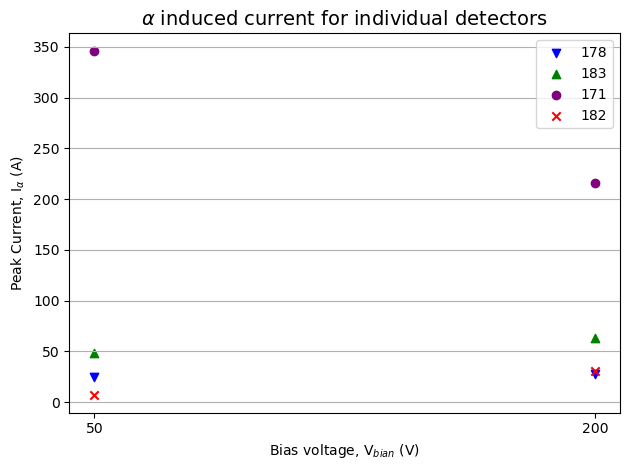

In [417]:
key_color=["blue", "green", "purple", "red"]
key_marker=["v", "^", "o", "x"]
key_label = [" (Caracas)", " (Reykjavik)", " (Quito)", " (Amsterdam)"]
for idx, key in enumerate(delta_curr_50):
    plt.scatter([50, 200],1e12*np.array([delta_curr_50[key], delta_curr_200[key]]), label=key, c=key_color[idx], marker=key_marker[idx])
plt.legend()
plt.xticks([50, 200])
plt.ylabel(r"Peak Current, I$_{\alpha}$ (A)")
plt.xlabel(r"Bias voltage, V$_{bian}$ (V)")
plt.title(r"$\alpha$ induced current for individual detectors", fontsize=14)
plt.tight_layout()
plt.grid(axis="y")

## Xray vs Hv for 01

In [418]:
run28_filedir = "/Users/giorgio/Gsi_data/Eris_run028.txt"

time, voltage, mean_current, mean_current_err = load_data(run28_filedir)

voltage_idx = ( 
    (277, 356, 1253, 1724), 
    (1807, 1908, 2114, 2868), 
    (2980, 3135, 3346, 4143), 
    (5114, 6751, 6874, 7252),
) 

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
baseline_xray_curr_01_hv_linearity = []
baseline_xray_curr_err_01_hv_linearity = []
delta_xray_curr_01_hv_linearity = []
delta_xray_curr_err_01_hv_linearity = []


for idxs in voltage_idx:
    idx1, idx2, idx3, idx4 = idxs

    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx3,idx4), time, mean_current, None
    )

    delta_xray_curr_01_hv_linearity.append(abs(peak_curr)-abs(base_curr))
    delta_xray_curr_err_01_hv_linearity.append(abs(peak_curr_err)-abs(base_curr_err))

    baseline_xray_curr_01_hv_linearity.append(base_curr)
    baseline_xray_curr_err_01_hv_linearity.append(base_curr_err)

"""
New file
"""

run29_filedir = "/Users/giorgio/Gsi_data/Eris_run029.txt"

time, voltage, mean_current, mean_current_err = load_data(run29_filedir)

voltage_idx = ( 
    (486, 719, 903, 2005), 
    (2232, 2538, 2740, 3505), 
    (3726, 3983, 4081, 4969), 
)


for idxs in voltage_idx:
    idx1, idx2, idx3, idx4 = idxs

    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx3,idx4), time, mean_current, None
    )

    delta_xray_curr_01_hv_linearity.append(peak_curr-base_curr)
    delta_xray_curr_err_01_hv_linearity.append(peak_curr_err-base_curr_err)

    baseline_xray_curr_01_hv_linearity.append(base_curr)
    baseline_xray_curr_err_01_hv_linearity.append(base_curr_err)

251
102


In [419]:
print(delta_xray_curr_01_hv_linearity)

[1.1190353137969722e-08, -3.211914705715289e-08, -1.39426936631972e-07, 1.4989343340756534e-06, 2.395426940079587e-06, 2.603924486497949e-06, 2.7306888575619285e-06]


# Xray linearity on 11

In [420]:

run30_filedir = "/Users/giorgio/Gsi_data/Eris_run030.txt" 

time, voltage, mean_current, mean_current_err = load_data(run30_filedir)

voltage_idx = ( 
    (12, 185, 215, 574), 
    (890, 941, 1220, 2847), 
    (2980, 3063, 3133, 3464), 
    (3645, 3861, 3896, 4777), 
    (4968, 5263, 5548, 9958), 
)

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
baseline_xray_curr_11_hv_linearity = []
baseline_xray_curr_err_11_hv_linearity = []
delta_xray_curr_11_hv_linearity = []
delta_xray_curr_err_11_hv_linearity = []


for idxs in voltage_idx:
    idx1, idx2, idx3, idx4 = idxs

    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx3,idx4), time, mean_current, None
    )

    delta_xray_curr_11_hv_linearity.append(abs(peak_curr)-abs(base_curr))
    delta_xray_curr_err_11_hv_linearity.append(abs(peak_curr_err)-abs(base_curr_err))

    baseline_xray_curr_11_hv_linearity.append(base_curr)
    baseline_xray_curr_err_11_hv_linearity.append(base_curr_err)

"""
New file
"""

run31_filedir = "/Users/giorgio/Gsi_data/Eris_run031.txt"

time, voltage, mean_current, mean_current_err = load_data(run31_filedir)

voltage_idx = ( 
    (921, 1294, 1417, 4295), 
    (5338, 8917, 9601, 11827), 
)



for idxs in voltage_idx:
    idx1, idx2, idx3, idx4 = idxs

    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx3,idx4), time, mean_current, None
    )

    delta_xray_curr_11_hv_linearity.append(peak_curr-base_curr)
    delta_xray_curr_err_11_hv_linearity.append(peak_curr_err-base_curr_err)

    baseline_xray_curr_11_hv_linearity.append(base_curr)
    baseline_xray_curr_err_11_hv_linearity.append(base_curr_err)

0
304


## Xray linearity on 00


In [421]:
run32_filedir = "/Users/giorgio/Gsi_data/Eris_run032.txt" 

time, voltage, mean_current, mean_current_err = load_data(run32_filedir)

voltage_idx = ( 
    (4, 69, 85, 389), 
    (432, 480, 489, 1253), 
    (1394, 1478, 1546, 3029), 
    (3403, 3935, 4160, 5229), 
    (5972, 6470, 6585, 7211), 
    (7653, 7868, 8089, 9116), 
    (9420, 9672, 9835, 10808), 
)

base_curr, base_curr_err = hypothesis_test_uniform(
    base_idx, time, mean_current, mean_current_err
)
baseline_xray_curr_00_hv_linearity = []
baseline_xray_curr_err_00_hv_linearity = []
delta_xray_curr_00_hv_linearity = []
delta_xray_curr_err_00_hv_linearity = []


for idxs in voltage_idx:
    idx1, idx2, idx3, idx4 = idxs

    base_curr, base_curr_err = hypothesis_test_uniform(
        (idx1,idx2), time, mean_current, None
    )

    peak_curr, peak_curr_err = hypothesis_test_uniform(
        (idx3,idx4), time, mean_current, None
    )

    delta_xray_curr_00_hv_linearity.append(abs(peak_curr)-abs(base_curr))
    delta_xray_curr_err_00_hv_linearity.append(abs(peak_curr_err)-abs(base_curr_err))

    baseline_xray_curr_00_hv_linearity.append(base_curr)
    baseline_xray_curr_err_00_hv_linearity.append(base_curr_err)

0


Text(0.5, 1.02, 'X-ray linearity peak current on Eris sCVD diamond detectors')

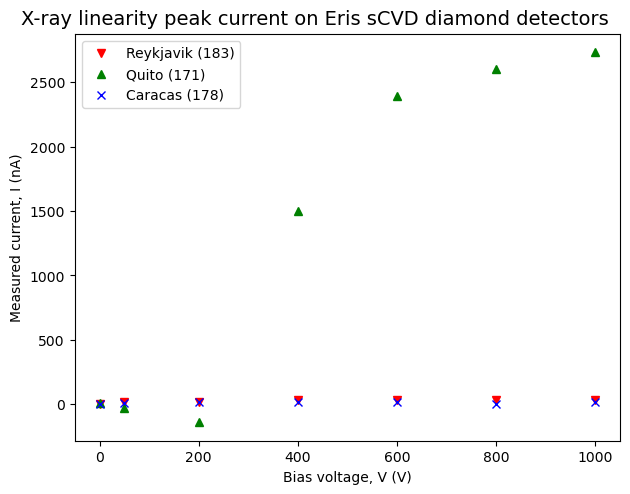

In [422]:

fig, ax1 = plt.subplots(1,1, )

xray_linearity_intensity = [0, 50, 200, 400, 600, 800, 1000]

ax1.errorbar(xray_linearity_intensity, 1e9*np.array(delta_xray_curr_00_hv_linearity), label="Reykjavik (183)", c="red", marker="v", ls="", )
ax1.errorbar(xray_linearity_intensity, 1e9*np.array(delta_xray_curr_01_hv_linearity),  label="Quito (171)" ,c="green", marker="^", ls="", )
# ax1.errorbar(xray_linearity_intensity, 1e9*np.array(xray_curr_182), yerr=xray_curr_err_182, c="purple", label="Amsterdam (182)", marker="o", ls="", )
ax1.errorbar(xray_linearity_intensity, 1e9*np.array(delta_xray_curr_11_hv_linearity), label="Caracas (178)", c="blue", marker="x", ls="", )
ax1.set_ylabel("Measured current, I (nA)")
ax1.set_xlabel(r"Bias voltage, V (V)")

ax1.legend()
fig.tight_layout()
fig.suptitle("X-ray linearity peak current on Eris sCVD diamond detectors", y=1.02, fontsize=14)

Text(0.5, 1.02, 'X-ray linearity base current on Eris sCVD diamond detectors')

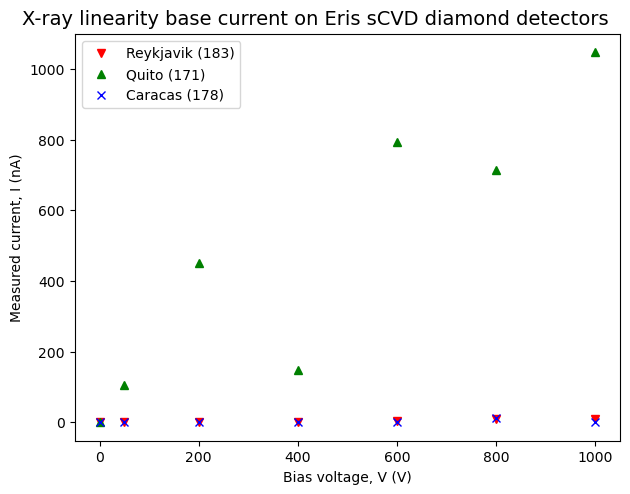

In [423]:

fig, ax1 = plt.subplots(1,1, )

xray_linearity_intensity = [0, 50, 200, 400, 600, 800, 1000]

ax1.errorbar(xray_linearity_intensity, 1e9*np.array(baseline_xray_curr_00_hv_linearity), label="Reykjavik (183)", c="red", marker="v", ls="", )
ax1.errorbar(xray_linearity_intensity, 1e9*np.array(baseline_xray_curr_01_hv_linearity),  label="Quito (171)" ,c="green", marker="^", ls="", )
# ax1.errorbar(xray_linearity_intensity, 1e9*np.array(xray_curr_182), yerr=xray_curr_err_182, c="purple", label="Amsterdam (182)", marker="o", ls="", )
ax1.errorbar(xray_linearity_intensity, 1e9*np.array(baseline_xray_curr_11_hv_linearity), label="Caracas (178)", c="blue", marker="x", ls="", )
ax1.set_ylabel("Measured current, I (nA)")
ax1.set_xlabel(r"Bias voltage, V (V)")

ax1.legend()
fig.tight_layout()
fig.suptitle("X-ray linearity base current on Eris sCVD diamond detectors", y=1.02, fontsize=14)